In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import os
import datetime
from Manipulate import extract_datetime_8760
import matplotlib
import glob
import re
import matplotlib.pyplot as plt
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
%matplotlib notebook


In [2]:
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
files = glob.glob(data_direi)
cities = []
for file in files:
    if 'USA_CA' in file:
        result = re.search('USA_CA_(.*)\.',file)
        cities.append(result.group(1))
building_types = []
city = cities[0]
dir = [dir for dir in files if city in dir]
files = glob.glob(str(dir[0] + '\*'))
for file in files:
    result = re.search('RefBldg(.*)New', file)
    building_types.append(result.group(1))
cities.sort()

In [3]:
dirzip = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\zipdata.csv'
zips = pd.read_csv(dirzip)

In [4]:
#read in sublap map
dirslm = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\PGE_Zip_To_Sublap_Map.xls'
slm = pd.read_excel(dirslm, skiprows =5)

In [19]:
zips.head()

ZIP        LAT        LNG
0  601  18.180555 -66.749961
1  602  18.361945 -67.175597
2  603  18.455183 -67.119887
3  606  18.158345 -66.932911
4  610  18.295366 -67.125135

In [20]:
len(cities)

73

In [76]:
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

key = '56f1fbdb95ae4174b7af4ba242d15dfe'
geocoder = OpenCageGeocode(key)

results = geocoder.geocode('Crescent City California USA')
pprint(results)

[{'annotations': {'DMS': {'lat': "41° 51' 10.10340'' N",
                          'lng': "124° 8' 59.50320'' W"},
                  'FIPS': {'county': '06015', 'state': '06'},
                  'MGRS': '10TDM0455134072',
                  'Maidenhead': 'CN71wu24aq',
                  'Mercator': {'x': -13820299.418, 'y': 5110438.948},
                  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=35974391#map=17/41.85281/-124.14986',
                          'url': 'https://www.openstreetmap.org/?mlat=41.85281&mlon=-124.14986#map=17/41.85281/-124.14986'},
                  'callingcode': 1,
                  'currency': {'alternate_symbols': ['US$'],
                               'decimal_mark': '.',
                               'disambiguate_symbol': 'US$',
                               'html_entity': '$',
                               'iso_code': 'USD',
                               'iso_numeric': 840,
                               'name': 'United States Dolla

In [67]:
len(results)

2

In [58]:
city = 'Camp.Pendleton-Dubai.Grow-Pos'
a = city.split('.')
b = []
for ci in a:
    b.append(ci.split('-'))
b

[['Camp'], ['Pendleton', 'Dubai'], ['Grow', 'Pos']]

In [60]:
city.replace('.','-')

'Camp-Pendleton-Dubai-Grow-Pos'

In [6]:
df = pd.DataFrame({'city':[],'lat':[], 'lon':[]})
df['city'] = cities
#PLUG IN CITY LIST TO GET OUT LAT LONGS
key = '56f1fbdb95ae4174b7af4ba242d15dfe'
geocoder = OpenCageGeocode(key)
for city in df['city']:
    citi = city.replace('.','-')
    chunks = citi.split('-')
    if len(chunks)>1:
        chunk = chunks[0]
        city_code = chunk + ' California USA'
        results = geocoder.geocode(city_code)
        if chunk in results[0]['formatted']:
            df.loc[df['city']==city, 'lat'] = results[0]['geometry']['lat']
            df.loc[df['city']==city, 'lon'] = results[0]['geometry']['lng']
            continue
        #if the city we want is not what we got add to it until we get it. 
        for i in range(1,len(chunks)):
            chunk = chunk +' '+ chunks[i]
            city_code = chunk + ' California USA'
            results = geocoder.geocode(city_code)
            if chunk in results[0]['formatted']:
                df.loc[df['city']==city, 'lat'] = results[0]['geometry']['lat']
                df.loc[df['city']==city, 'lon'] = results[0]['geometry']['lng']
                break
    else:
        city_code = city + ' California USA'
        results = geocoder.geocode(city_code)
        df.loc[df['city']==city, 'lat'] = results[0]['geometry']['lat']
        df.loc[df['city']==city, 'lon'] = results[0]['geometry']['lng']

In [85]:
key = '56f1fbdb95ae4174b7af4ba242d15dfe'
geocoder = OpenCageGeocode(key)
i=0
results = geocoder.reverse_geocode(df['lat'][i], df['lon'][i])
pprint(results)

[{'annotations': {'DMS': {'lat': "41° 29' 13.77276'' N",
                          'lng': "120° 32' 32.02152'' W"},
                  'FIPS': {'county': '06049', 'state': '06'},
                  'MGRS': '10TGL0518095754',
                  'Maidenhead': 'CN91rl46ww',
                  'Mercator': {'x': -13418699.468, 'y': 5056152.351},
                  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=416215136#map=17/41.48716/-120.54223',
                          'url': 'https://www.openstreetmap.org/?mlat=41.48716&mlon=-120.54223#map=17/41.48716/-120.54223'},
                  'callingcode': 1,
                  'currency': {'alternate_symbols': ['US$'],
                               'decimal_mark': '.',
                               'disambiguate_symbol': 'US$',
                               'html_entity': '$',
                               'iso_code': 'USD',
                               'iso_numeric': 840,
                               'name': 'United States Dol

In [28]:
df = df.drop(70, axis=0)
df

city        lat         lon  \
0                                  Alturas  41.487123 -120.542327   
1                                Arcata.AP  40.866517 -124.082840   
2                Bakersfield-Meadows.Field  35.373871 -119.019464   
3                       Barstow.Daggett.AP  34.895768 -117.017208   
4                                Beale.AFB  39.108761 -121.356690   
5                                Bishop.AP  37.363679 -118.395240   
6                           Blue.Canyon.AP  32.692535 -117.138353   
7               Blythe-Riverside.County.AP  33.560394 -114.912069   
8   Burbank-Glendale-Passadena.Bob.Hope.AP  34.181648 -118.325855   
9                           Camarillo.AWOS  34.216410 -119.037657   
10                     Camp.Pendleton.MCAS  33.216702 -117.400040   
11                                Carlsbad  33.158093 -117.350597   
12                          China.Lake.NAF  37.998920 -122.490332   
13                                Chino.AP  34.013356 -117.690075   
14         Chula.Vista-Brown.Field.Muni.AP  33.042213 -117.168182   
15                  Concord-Buchanan.Field  37.976852 -122.033562   
16       Crescent.City-Jack.McNamara.Field  41.852806 -124.149862   
17                             Edwards.AFB  34.926083 -117.935068   
18                    Fairfield-Travis.AFB  38.249358 -122.039966   
19                     Fresno.Air.Terminal  36.739442 -119.784831   
20                       Fullerton.Muni.AP  33.870821 -117.929417   
21           Hawthorne-Jack.Northrop.Field  33.918859 -118.348326   
22                    Hayward.Air.Terminal  37.668821 -122.080796   
23                      Imperial.County.AP  33.030549 -115.359567   
24              Lancaster-Gen.Wm.Fox.Field  34.698106 -118.136615   
25                             Lemoore.NAS  36.300649 -119.782712   
26                       Livermore.Muni.AP  37.682058 -121.768053   
27                             Lompoc.AWOS  34.639150 -120.457941   
28              Long.Beach-Daugherty.Field  37.767173 -122.150148   
29                     Los.Angeles.Intl.AP  34.053683 -118.242767   
..                                     ...        ...         ...   
42                             Palmdale.AP  34.579313 -118.117111   
43                     Paso.Robles.Muni.AP  35.634487 -120.670282   
44                          Point.Mugu.NAS  33.902918 -118.394919   
45                        Porterville.AWOS  36.065230 -119.016768   
46                       Red.Bluff.Muni.AP  34.151569 -118.002310   
47                         Redding.Muni.AP  40.586356 -122.391675   
48                       Riverside.Muni.AP  33.953355 -117.396162   
49                      Sacramento.Exec.AP  38.581572 -121.494400   
50                     Sacramento.Metro.AP  38.581572 -121.494400   
51                         Salinas.Muni.AP  36.674412 -121.655037   
52               San.Diego-Lindbergh.Field  32.733361 -117.192246   
53                   San.Diego-Miramar.NAS  32.733361 -117.192246   
54              San.Diego-Montgomery.Field  32.733361 -117.192246   
55              San.Diego-North.Island.NAS  32.733361 -117.192246   
56                   San.Francisco.Intl.AP  32.733361 -117.192246   
57                        San.Jose.Intl.AP  32.733361 -117.192246   
58                      San.Luis.Obispo.AP  32.733361 -117.192246   
59                                Sandberg  33.667486 -117.797237   
60                 Santa.Ana-John.Wayne.AP  33.749495 -117.873221   
61                   Santa.Barbara.Muni.AP  34.422132 -119.702667   
62                   Santa.Maria.Public.AP  34.953130 -120.435858   
63                    Santa.Monica.Muni.AP  34.025072 -118.496513   
64                         Santa.Rosa.AWOS  38.440467 -122.714431   
65          South.Lake.Tahoe-Lake.Tahoe.AP  33.305477 -118.343230   
66                       Stockton.Metro.AP  37.957702 -121.290780   
67                        Truckee.Tahoe.AP  39.327962 -120.183253   
68                        Twentynine

In [29]:
df['coords'] = list(zip(df.lon, df.lat))
df['coords'] = df['coords'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='coords')
print(gdf)

                                      city        lat         lon  \
0                                  Alturas  41.487123 -120.542327   
1                                Arcata.AP  40.866517 -124.082840   
2                Bakersfield-Meadows.Field  35.373871 -119.019464   
3                       Barstow.Daggett.AP  34.895768 -117.017208   
4                                Beale.AFB  39.108761 -121.356690   
5                                Bishop.AP  37.363679 -118.395240   
6                           Blue.Canyon.AP  32.692535 -117.138353   
7               Blythe-Riverside.County.AP  33.560394 -114.912069   
8   Burbank-Glendale-Passadena.Bob.Hope.AP  34.181648 -118.325855   
9                           Camarillo.AWOS  34.216410 -119.037657   
10                     Camp.Pendleton.MCAS  33.216702 -117.400040   
11                                Carlsbad  33.158093 -117.350597   
12                          China.Lake.NAF  37.998920 -122.490332   
13                                

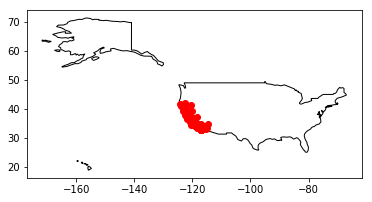

In [30]:
#Plot US with geopandas daatasets
cal = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = cal[cal.name == 'United States'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

In [11]:
zdf = gpd.read_file(r'C:\Users\jglasskatz\Desktop\census2017\cb_2017_us_zcta510_500k.shp')

In [12]:
zdf['zip'] = zdf['ZCTA5CE10'].astype('int')
czip = zdf.loc[zdf['zip']>90000]

In [31]:
new_df = gpd.sjoin(gdf, czip, how='inner', op='intersects')

C:\Users\jglasskatz\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [32]:
list(new_df)

['city',
 'lat',
 'lon',
 'coords',
 'index_right',
 'ZCTA5CE10',
 'AFFGEOID10',
 'GEOID10',
 'ALAND10',
 'AWATER10',
 'zip']

In [33]:
len(new_df)

72

In [153]:
gpd.read_file(r'C:\Users\jglasskatz\Desktop\zip_shape\tl_2010_us_zcta510.shp')

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10     ALAND10  AWATER10  \
0         04757   04757        B5   G6350          S   334700805   3663844   
1         04758   04758        B5   G6350          S    91006829    191946   
2         04760   04760        B5   G6350          S   259787771    547534   
3         04975   04975        B5   G6350          S      142318         0   
4         04976   04976        B5   G6350          S   257908035   4722278   
5         04426   04426        B5   G6350          S   400074698  23412773   
6         04427   04427        B5   G6350          S   104108159         0   
7         04428   04428        B5   G6350          S   154153075   7568185   
8         04429   04429        B5   G6350          S   182704788  16172556   
9         04430   04430        B5   G6350          S    23379537   2459400   
10        04431   04431        B5   G6350          S      809372    310731   
11        04434   04434        B5   G6350          S    64253326    414393   
12        04435   04435        B5   G6350          S    99875579     63697   
13        04438   04438        B5   G6350          S    63737496   3359797   
14        04441   04441        B5   G6350          S  1505788328  66124522   
15        04442   04442        B5   G6350          S   193978471   7758796   
16        04443   04443        B5   G6350          S   355821865  22465491   
17        04444   04444        B5   G6350          S   178825188   2394965   
18        04448   04448        B5   G6350          S   285979789  10200676   
19        04761   04761        B5   G6350          S    47825569   2817463   
20        04762   04762        B5   G6350          S   102998140    239357   
21        04763   04763        B5   G6350          S    90794119   1977091   
22        04764   04764        B5   G6350          S   170008341   1933731   
23        04765   04765        B5   G6350          S  1480480446  59081627   
24        04766   04766        B5   G6350          S    94620086    278430   
25        04768   04768        B5   G6350          S   537310255  21542045   
26        04769   04769        B5   G6350          S   196210371   4776762   
27        04978   04978        B5   G6350          S    39139863  12567288   
28        04979   04979        B5   G6350          S   113560523   2827138   
29        04449   04449        B5   G6350          S    96617667   5707899   
...         ...     ...       ...     ...        ...         ...       ...   
33090     05403   05403        B5   G6350          S    42477974    496476   
33091     05404   05404        B5   G6350          S     3697712    205994   
33092     05405   05405        B5   G6350          S      602184         0   
33093     05408   05408        B5   G6350          S    10930278    714657   
33094     05439   05439        B5   G6350          S      458147     29691   
33095     05440   05440        B5   G6350          S    75473054   1489385   
33096     05441   05441        B5   G6350          S    82423250    216243   
33097     05442   05442        B5   G6350          S    82799135    127632   
33098     05443   05443        B5   G6350          S   293742478   2779870   
33099     02882   02882        B5   G6350          S    33140275  13112517   
33100     02885   02885        B5   G6350          S    15868796   6702395   
33101     02886   02886        B5   G6350          S    38654310   5649581   
33102     02888   02888        B5   G6350          S    15358671   3137217   
33103     02889   02889        B5   G6350          S    22521492  21182733   
33104     02891   02891        B5   G6350          S    68268331  12480943   
33105     02892   02892        B5   G6350          S    70949427   5028929   
33106     05444   05444        B5   G6350          S    52426130    666930   
33107     05445   05445        B5   G6350          S   106859626    392842   
33108     05446   05446        B5   G6350          S    94936779   2183677   
33109     05447   05447     

In [16]:
list(slm)

['SERVICE ZIP', 'ZONE NAME']

In [17]:
slm.rename({'SERVICE ZIP':'zip','ZONE NAME':'sublap'}, axis = 1, inplace=True)

In [34]:
mapdf = new_df.merge(slm, how = 'inner')

In [35]:
#you lose just over half of all the cities here. What's going on? 
len(mapdf)

36

In [203]:
mapdf.to_csv( r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\zipsublap.csv')

In [175]:
slm.sublap.nunique()

16

In [200]:
k = np.isin(slm.sublap.unique(),mapdf.sublap.unique())
#the missing laps
slm.sublap.unique()[~k]

array(['SLAP_PGP2-APND', 'SLAP_PGSF-APND'], dtype=object)

In [182]:
# Missing two sublaps. 
#How should we choose the representative cities???
#Doing it alphabetically
sln = mapdf.groupby('sublap', as_index=False).agg({'city':'first'})

In [183]:
sln

sublap                       city
0   SLAP_PGCC-APND               Monterey.NAF
1   SLAP_PGEB-APND     Concord-Buchanan.Field
2   SLAP_PGF1-APND        Fresno.Air.Terminal
3   SLAP_PGFG-APND             Napa.County.AP
4   SLAP_PGHB-APND                  Arcata.AP
5   SLAP_PGLP-APND  Bakersfield-Meadows.Field
6   SLAP_PGNB-APND             China.Lake.NAF
7   SLAP_PGNC-APND              Ukiah.Muni.AP
8   SLAP_PGNV-APND            Redding.Muni.AP
9   SLAP_PGSA-APND                  Beale.AFB
10  SLAP_PGSB-APND       Hayward.Air.Terminal
11  SLAP_PGSI-APND           Truckee.Tahoe.AP
12  SLAP_PGSN-APND        Paso.Robles.Muni.AP
13  SLAP_PGST-APND          Stockton.Metro.AP